In [2]:
import numpy as np
import matplotlib.pyplot as plt
import inspect

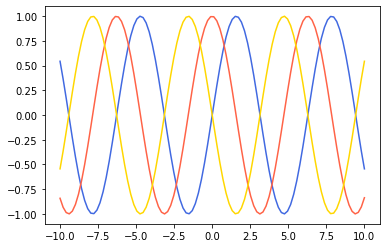

In [6]:
x_h = lambda x, h, i: [x[j] + ( h if j == i else 0) for j in range(len(x))]
f_d = [
    lambda f, x, h, i: (f(*x_h(x, h, i)) - f(*x)) / h, # Grado 1
    lambda f, x, h, i: (f(*x_h(x, -h, i)) - 2*f(*x) + f(*x_h(x, h, i))) / h**2, # Grado 2
]

def deriv(f, x, h, p, deg):
    s = inspect.signature(f)
    i_x = [p_ == p for p_ in s.parameters].index(True)
    return f_d[deg-1](f, x, h, i_x)

f = lambda x, y: np.sin(x)
x = np.linspace(-10, 10, 100)

dfdx = [deriv(f, (x_, 0), 0.01, "x", 1) for x_ in x]
dfdx2 = [deriv(f, (x_, 0), 0.01, "x", 2) for x_ in x]

plt.plot(x, f(x, np.zeros(100)), color="royalblue")
plt.plot(x, dfdx, color="tomato")
plt.plot(x, dfdx2, color="gold")

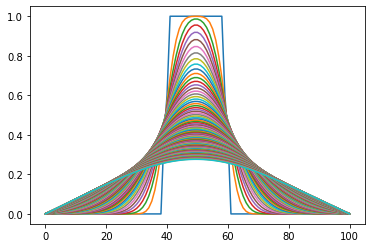

In [9]:
N = 100
T = np.zeros(N + 1)
T[40:60] = 1
a = 1
dt = 0.1
dx = 0.5

for n in range(1000):
    T_ = [0] + [T[i] + (a*dt)/(dx**2) * (T[i-1] - 2*T[i] + T[i+1]) for i in range(1, N)] + [0]
    T = [t for t in T_]
    if n%10 == 0:
        plt.plot(T)

In [60]:
def coeficientes(grado=1, puntos=3):
    assert puntos > grado, "el número de puntos debe ser mayor que el grado de integración"
    assert puntos % 2 != 0, "el número de puntos debe ser impar"
    # Calcular una vector vertical con el número de puntos
    n = puntos >> 1 # para 3 puntos es 1, para 5 es 2, ...
    p = np.arange(-n, n + 1.0)[:, np.newaxis]
    X = p**0.0
    # Construir una matriz de coeficientes
    for k in range(1, puntos):
        X = np.hstack([X, p**k])
    # Matriz inversa
    Xi = np.linalg.inv(X)
    # Calcular los coeficientes
    w = np.prod(np.arange(1, grado+1), axis=0) * Xi[grado]
    return w

print(coeficientes(2))

[ 1. -2.  1.]


In [ ]:
def test_deriv(f, x0, dx, n, points=3):
    weights = coeficientes(points, n)
    val = 0.0
    ho = points >> 1
    for k in range(points):
        val += weights[k]*f(x0+(k-ho)*dx, 0)
    return val / np.prod((dx,)*n,axis=0)